# Assignment - Linear Regression Model

The dataset consists of salary information with years of experience. You are to write a report covering following points: -

1.    Find summary statistics of both variables and find out is there any anomaly or not.

2.    Draw a scatter plot and explain if there is a linear relationship between salary and years of experience.

3.    Randomly split the into train dataset (70%) and test dataset (30%).

4.    If you find if there is a linear relationship, then fit a simple linear model and explain: -
        a.    Goodness of fit
        b.    Estimated values of parameters
        c.    p-value of each parameter.
        d.     Validate the result with test dataset

### 1.    Find summary statistics of both variables and find out is there any anomaly or not.

##### Step 1: Import the libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as smf
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Step 2: Import and the data

In [2]:
df = pd.read_csv (r'salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


##### Step 3: Explore the data

In [3]:
df.shape

(30, 2)

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### 2.    Draw a scatter plot and explain if there is a linear relationship between salary and years of experience.

##### Step 4: Plot the salary v/s Year of Experience

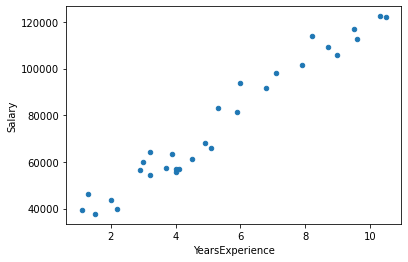

In [5]:
df.plot.scatter(x='YearsExperience',y='Salary');

### 3.    Randomly split the into train dataset (70%) and test dataset (30%).

##### Step 5: Split the data for testing and training

In [6]:
training_data = df.iloc[:,:-1].values
test_data = df.iloc[:,1].values
x_train,x_test,y_train,y_test = train_test_split(training_data,test_data,test_size=0.3,random_state=0)

### 4b.    Estimated values of parameters

##### Step 6: Use Linear Regression and train the inputs find regression coefficient

In [14]:
reg = LinearRegression()
reg.fit(x_train,y_train);

##### Step 7: Predict the output of validation class 

In [8]:
y_predict = reg.predict(x_test)
print(y_predict)

[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]


##### Step 8: Find regression coefficient and intercept

In [9]:
print(reg.intercept_)
print(reg.coef_)

26777.391341197625
[9360.26128619]


### 4d.     Validate the result with test dataset

##### Step 9: Plot the graph of Linear regression

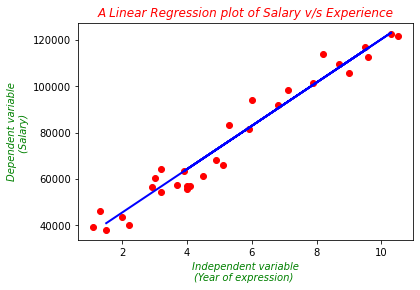

In [10]:
plt.scatter(training_data,test_data,color="red")
plt.plot(x_test,y_predict,color="blue",linewidth=2)
plt.title('A Linear Regression plot of Salary v/s Experience',color='red',style='oblique')
plt.xlabel('Independent variable\n(Year of expression) ',color='green',style='italic')
plt.ylabel('Dependent variable\n(Salary) ',color='green',style='italic')
plt.show()

##### Step 10: Tabulate Predicted v/s Actual Test Data

In [16]:
print (" Predicted Data v/s Actual Data")
print('__________________________________________')
headers = ['Predicted Data', 'Actual Data', 'Difference']    
table = zip( y_predict, y_test, y_test-y_predict)
print(tabulate(table, headers=headers, floatfmt=".2f"))
print('__________________________________________')

 Predicted Data v/s Actual Data
__________________________________________
  Predicted Data    Actual Data    Difference
----------------  -------------  ------------
        40817.78       37731.00      -3086.78
       123188.08      122391.00       -797.08
        65154.46       57081.00      -8073.46
        63282.41       63218.00        -64.41
       115699.87      116969.00       1269.13
       108211.66      109431.00       1219.34
       116635.90      112635.00      -4000.90
        64218.44       55794.00      -8424.44
        76386.78       83088.00       6701.22
__________________________________________


### 4a.    Goodness of fit

##### Step 11: Find Mean Square Error and Coifficient of determination

In [12]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))

Mean squared error: 23370078.80
Coefficient of determination: 0.97


### 4c.    p-value of each parameter.

##### Step 11: Find p-value and R<sup>2</sup> Value

In [13]:
x2 = smf.add_constant(training_data)
est = smf.OLS(test_data, x2)
stat_model = est.fit()
print(stat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.14e-20
Time:                        17:19:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.0

# THE END